EXAM INFO284 - 2023 SPRING

Task 1

In this task we have decided to make the three classification models on the dataset of mushrooms by using KNN, BernoulliNB and RandomForestClassifier. 
The dataset contains information about different mushrooms and their edibility. It consists of over 8000 instances, with 22 features. In this task we will use build classification models that will predict whether the mushroom is edible or not based on these features. 
Before we start building the classification models, we will be exploring the dataset, get an understanding of what it contains, then clean the data and prepare the data for modeling. 



In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

We import the modules and libaries that will be used. Pandas provides a wide range of tools, makes it easy to xplore and visulize data which is great for machine learning where the quality of the data is important for results. 
We will be using a quite large amout of data, which panda is great at handeling efficiently 

We are also using the sklearn liberary for all classification and 

In [84]:
#reading the csv mushroom dataset
mushroom = pd.read_csv('agaricus-lepiota.csv')
df= pd.DataFrame(mushroom)
mushroom.head()

,e,x,s,y,t,a,f,c,b,k,...,s.2,w,w.1,p,w.2,o,p.1,n,n.1,g
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [85]:
#labeling the columns
labels = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruised', 'odor',
'gill_attachment', 'gill_spacing', 'gill-size', 'gill_color', 'stalk_shape', 'stalk_root',
'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring','veil_type', 'veil_color', 'ring_number',
'ring-type', 'spore_print_color', 'population', 'habitat']


df.columns = labels
mushroom.head()


,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [86]:
#encoding the categorical data, giving each category an unique numerical value
labelencoder = LabelEncoder()

for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

mushroom.head()  

,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In [87]:
#no null/missing values in the dataset
df.isna().sum()


class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruised                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill-size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring-type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

0    4207
1    3915
Name: class, dtype: int64


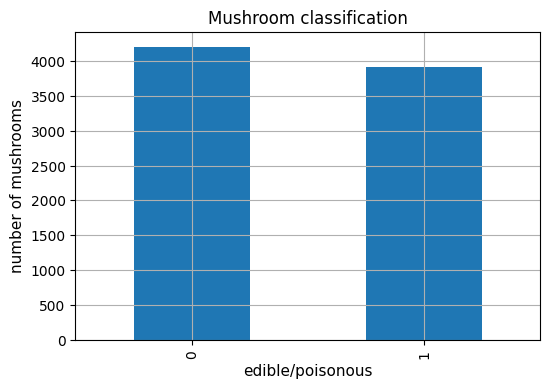

In [88]:
#using plt to visulize
mushroom.shape
count = mushroom['class'].value_counts()
print(count)

plt.figure(figsize=(6,4))
count.plot(kind='bar')
plt.grid(True)
plt.xlabel('edible/poisonous', fontsize = 11)
plt.ylabel('number of mushrooms', fontsize = 11)
plt.title('Mushroom classification')

plt.show()



We visulize the distribution between the two classes, edible and poisonous. 

In [89]:
df.drop('veil_type', axis=1)

,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill-size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8118,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8119,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8120,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


Dropping the feature veil_type because it only gave us one value - a constant feature, that would not help the prediciton. 

In [90]:
#making set without the feature class as x
x= df.loc[:, df.columns != 'class']
x.head()


,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill-size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
1,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
2,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
3,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
4,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3


In [91]:
#the y will be the feature class - that we should predict
y = df['class'].to_frame()
y.head()

,class
0,0
1,1
2,0
3,0
4,0


In [92]:
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=56)

In [93]:
print(X_train.shape)
print(y_train.shape)

(6497, 22)
(6497, 1)


In [94]:
print(X_test.shape)
print(y_test.shape)

(1625, 22)
(1625, 1)


Tester for overfitting med cross validation KFold, using knn 

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [96]:

knn= KNeighborsClassifier(n_neighbors=100)

folds = KFold(n_splits= 5)
scores = cross_val_score(knn, x, y.values.ravel(), cv = folds)
print(scores)
print(scores.mean())



As we can see after using the KFold method, the first fold gives us worse estimate than the rest of the folds, 
there could be multiple reasons for that. The first fold could be containing data that is significantly different than the rest of the folds, or the model being too complex and overfitting. 

1.  KNN
We now use the KNeighborsClassifier to classify the edbility of the mushrooms 

In [ ]:
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn.score(X_test, y_test)

0.9556923076923077

With 100 neighbours the models accuracy is very high 

2. RandomForest
Finding the important features of this data set could help to reduse the dimentions of the dataset. to do this we will use the RandomForestClassification. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


C:\Users\Ida\AppData\Local\Temp\ipykernel_8564\922225005.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


|    | feature                  |   feature_importance |
|---:|:-------------------------|---------------------:|
|  0 | cap_shape                |           0.00534147 |
|  1 | cap_surface              |           0.0097472  |
|  2 | cap_color                |           0.0144692  |
|  3 | bruised                  |           0.0431765  |
|  4 | odor                     |           0.136103   |
|  5 | gill_attachment          |           0.00141949 |
|  6 | gill_spacing             |           0.0411084  |
|  7 | gill-size                |           0.107089   |
|  8 | gill_color               |           0.0980123  |
|  9 | stalk_shape              |           0.0276442  |
| 10 | stalk_root               |           0.06262    |
| 11 | stalk_surface_above_ring |           0.0500295  |
| 12 | stalk_surface_below_ring |           0.0517593  |
| 13 | stalk_color_above_ring   |           0.0170426  |
| 14 | stalk_color_below_ring   |           0.0169812  |
| 15 | veil_type               

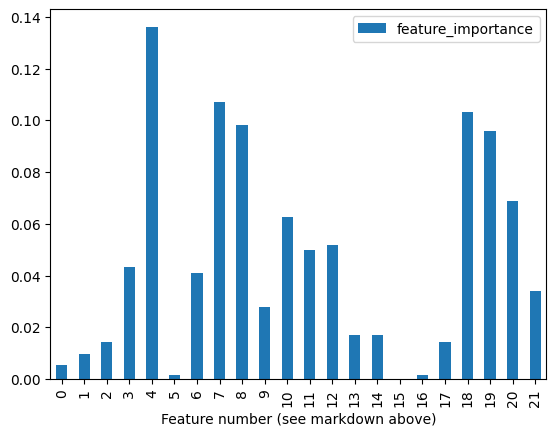

In [ ]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
feature_importance = pd.DataFrame(
    {'feature': list(X_train.columns),
     'feature_importance': [abs(i) for i in RF.feature_importances_]}  
)
print(feature_importance.to_markdown())

feature_importance.plot(kind = 'bar')
plt.xlabel('Feature number (see markdown above)')
plt.show()

The inspiration to find important features and use them in this way, we got from this site: towardsdatascience.com, by Giovanni Valdata: https://towardsdatascience.com/feature-importance-to-predict-mushrooms-edibility-in-python-5aa133fea3f8, 14.09. 22, read: 10.04.23

We are also using RF to classify the mushrooms. With using all the features we can find the accuracy in identifing the mushrooms edibility with RandomForest

In [ ]:
RF.score(X_test, y_test)

1.0

We see that the accuracy is 100% 

3. BernoulliNB
BernoulliNB is another classification model that we will use to classify the mushrooms 

In [ ]:
#importing BernoulliNB classification that we will use next
from sklearn.naive_bayes import BernoulliNB


In [ ]:
model = BernoulliNB(alpha=0.2)
model.fit(X_train, y_train.values.ravel())


BernoulliNB(alpha=0.2)

Because this is a binary classification problem we decided to use the BernoulliNB algorithm. It works well with binary data and can handle large number of features and high-dimentional datasets, like we have in the mushroomset  

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       853
           1       0.89      0.73      0.80       772

    accuracy                           0.83      1625
   macro avg       0.84      0.83      0.83      1625
weighted avg       0.84      0.83      0.83      1625



In [ ]:
accuracy_score(y_test, pred)

0.8307692307692308

Now we could also use feature selection, only the most important features for the model, this could also reduse overfitting. We test it on our two best performing models, knn and RF.  

In [ ]:
#making new variables for the new data to be used, mostly for the visability we also make a new y
x2 = df[['odor', 'gill-size', 'gill_color', 'spore_print_color']]
y2 = df['class']

#splitting again - with way less features as x
X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2, random_state=56)

RF.fit(X2_train, y2_train)
knn.fit(X2_train, y2_train)
pred_RF = RF.predict(X2_test)

print(classification_report(y2_test, pred_RF))

#printing the score accuracy for both to compare 
print('RandomForestClassifier score: ', RF.score(X2_test, y2_test))
print('Knn score: ', knn.score(X2_test, y2_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       853
           1       0.98      1.00      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

RandomForestClassifier score:  0.9926153846153846
Knn score:  0.9673846153846154


Using only the important features also gives us aboutthe same accuracy as using all of the features in the dataset on the RandomForest model. The KNearestNeighbour got a litle better accuracy. 

Based on the outcome of the different models used in this task, we would trust the RandomForest model to choose which mushrooms to eat. 
It has the abilty to identify the important features and give us an good accuracy score based on these features. It is also good to use on high-dimensional datasets like the mushroom dataset. This is where KNN is not as goood compared, because the large number of categories makes it difficult to find the best neighbours. Another factor could be that the Knn is prone to overfitting because it dont have enough data to generalize well. 
THe RandomForest classifier can also handle non-linear datasets 